In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

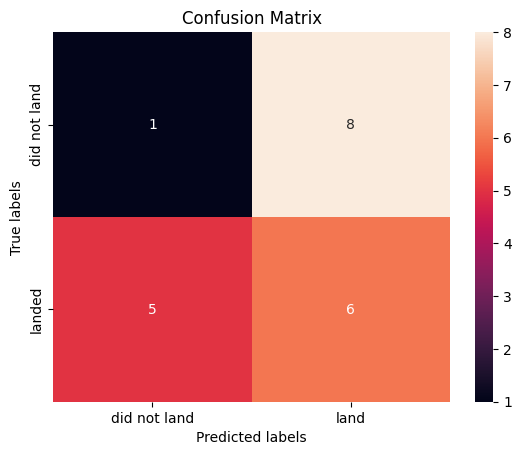

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Supongamos que tienes tus datos en un DataFrame llamado 'df'
# Y que 'Class' es la columna con las etiquetas (0 o 1)

# Crear datos de ejemplo, en caso de no tenerlos.
data = {'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'Class': np.random.randint(0, 2, 100)}
df = pd.DataFrame(data)

# Dividir los datos en características (X) y etiquetas (y)
X = df[['feature1', 'feature2']]
y = df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = logreg.predict(X_test)

def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Llamar a la función para mostrar la matriz de confusión
plot_confusion_matrix(y_test, y_pred)

In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
from js import fetch
import io
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

# Guardar el DataFrame como un archivo CSV local
data.to_csv('dataset_local.csv', index=False)

print("El archivo CSV se ha guardado como 'dataset_local.csv'")

El archivo CSV se ha guardado como 'dataset_local.csv'


In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [10]:
from js import fetch
import io
import pandas as pd

# Descargar dataset_part_3.csv
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Ahora tienes los datos en el DataFrame 'X'
# Puedes usar X.head() para ver las primeras filas del DataFrame
print("Primeras filas de dataset_part_3.csv:")
print(X.head())

# Si deseas guardarlo localmente como archivo CSV:
X.to_csv('dataset_part_3_local.csv', index=False)

print("\nArchivo CSV guardado localmente como:")
print("- dataset_part_3_local.csv")

Primeras filas de dataset_part_3.csv:
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0 

In [11]:
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu DataFrame ya cargado
# ... (tu código para cargar el DataFrame 'data') ...

# Extraer la columna 'Class' como una Serie de Pandas y convertirla a un array NumPy
Y = data['Class'].to_numpy()

# Verificar el tipo de 'Y' (debería ser un array NumPy)
print(type(Y))

# Si quieres ver los primeros elementos de 'Y'
print(Y[:5])

<class 'numpy.ndarray'>
[0 0 0 0 0]


In [12]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos en X y transformarlos
X = scaler.fit_transform(X)

# Ahora X contiene los datos estandarizados
print(type(X))
print(X[:5]) # Muestra las primeras 5 filas de los datos estandarizados

<class 'numpy.ndarray'>
[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearchCV
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Crear un objeto de regresión logística
lr = LogisticRegression()

# Crear un objeto GridSearchCV con validación cruzada de 10 pliegues (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento (X, Y)
logreg_cv.fit(X, Y) # Asumiendo que Y es tu variable objetivo (Class)

# Imprimir los mejores parámetros y la precisión
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


Accuracy on test data: 0.9444444444444444


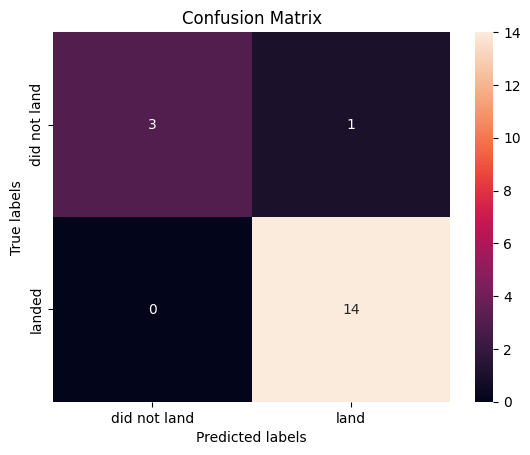

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ajustar el modelo GridSearchCV a los datos de entrenamiento
logreg_cv.fit(X_train, Y_train)

# Calcular la precisión en el conjunto de prueba
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Hacer predicciones en el conjunto de prueba
yhat = logreg_cv.predict(X_test)

# Función para graficar la matriz de confusión (como la que definiste antes)
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Visualizar la matriz de confusión
plot_confusion_matrix(Y_test, yhat)

In [15]:
plt.savefig('matriz_confusion.png')

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir los parámetros para GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Crear un objeto SVM
svm = SVC()

# Crear un objeto GridSearchCV con validación cruzada de 10 pliegues (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento (X_train, Y_train)
svm_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros y la precisión
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.832142857142857


Accuracy on test data (SVM): 0.8888888888888888


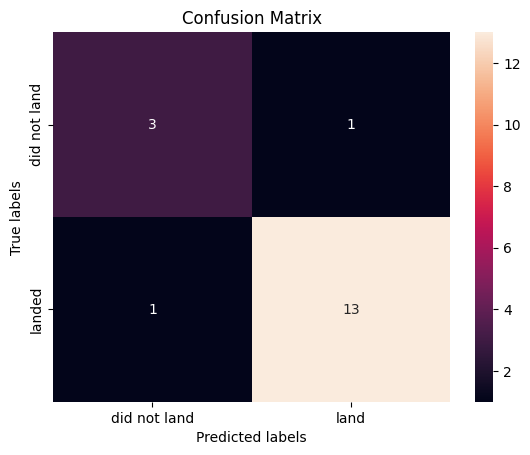

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones en el conjunto de prueba
yhat_svm = svm_cv.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_svm = accuracy_score(Y_test, yhat_svm)
print("Accuracy on test data (SVM):", accuracy_svm)

# Función para graficar la matriz de confusión (como la que definiste antes)
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Visualizar la matriz de confusión
plot_confusion_matrix(Y_test, yhat_svm)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir los parámetros para GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Crear un objeto DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Crear un objeto GridSearchCV con validación cruzada de 10 pliegues (cv=10)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento (X_train, Y_train)
tree_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros y la precisión
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8875


Accuracy on test data (Decision Tree): 0.6111111111111112


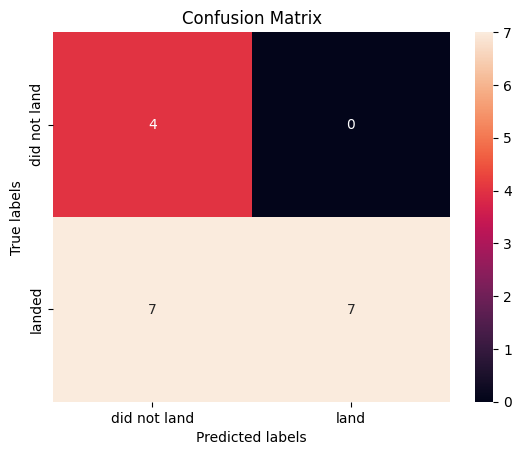

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones en el conjunto de prueba
yhat_tree = tree_cv.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_tree = accuracy_score(Y_test, yhat_tree)
print("Accuracy on test data (Decision Tree):", accuracy_tree)

# Función para graficar la matriz de confusión (como la que definiste antes)
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Visualizar la matriz de confusión
plot_confusion_matrix(Y_test, yhat_tree)

In [20]:
plt.savefig('matriz_confusion_tree.png')

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Crear un objeto KNeighborsClassifier
KNN = KNeighborsClassifier()

# Crear un objeto GridSearchCV con validación cruzada de 10 pliegues (cv=10)
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento (X_train, Y_train)
knn_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros y la precisión
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


Accuracy on test data (KNN): 0.9444444444444444


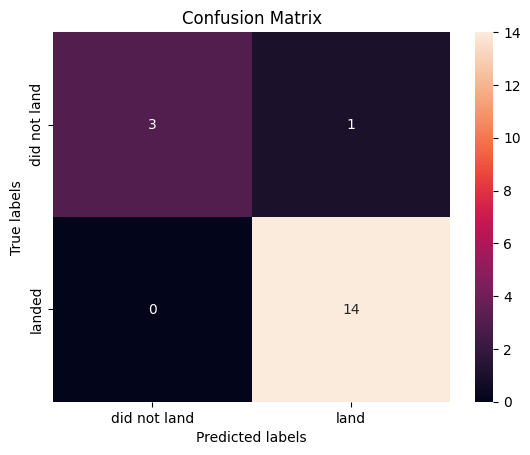

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones en el conjunto de prueba
yhat_knn = knn_cv.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_knn = accuracy_score(Y_test, yhat_knn)
print("Accuracy on test data (KNN):", accuracy_knn)

# Función para graficar la matriz de confusión (como la que definiste antes)
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Visualizar la matriz de confusión
plot_confusion_matrix(Y_test, yhat_knn)

In [ ]:
Resumen de los resultados:

Regresión Logística:
Precisión en el conjunto de prueba: 94.44%
Máquina de Vectores de Soporte (SVM):
Precisión en el conjunto de prueba: 88.89%
Árbol de Decisión:
Precisión en el conjunto de prueba: 61.11%
K-Vecinos Más Cercanos (KNN):
Precisión en el conjunto de prueba: 94.44%